<a href="https://colab.research.google.com/github/ArifRezaKhan/pythonDS/blob/master/Hugging_Face_Course_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install transformers

# The Pipeline Abstraction

The most basic object in the Transformers library is the `pipeline()` function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer.



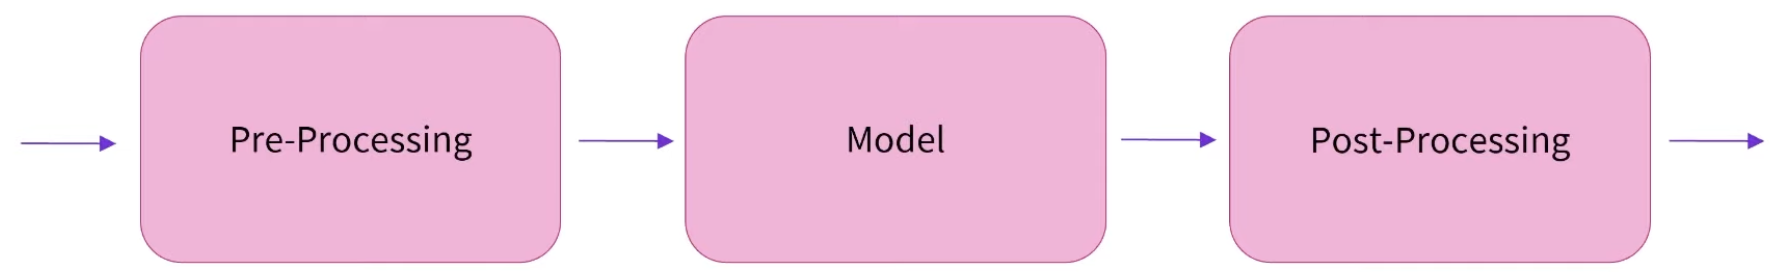

There are three main steps involved when you pass some text to a pipeline:

- The text is preprocessed into a format the model can understand.
- The preprocessed inputs are passed to the model.
- The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines are:

- sentiment-analysis
- zero-shot-classification
- text-generation
- fill-mask
- ner (named entity recognition)
- question-answering
- feature-extraction (get the vector representation of a text)
- summarization
- translation


## Sentiment Analysis

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
# You can pass multiple texts to the same pipline
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## Zero-shot Classification Pipeline

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445993661880493, 0.1119738519191742, 0.04342673718929291]}

## Text Generation

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you to understand how to build trust, how to work with people, to talk to, to share. We will share with all in our class how to use these techniques. We will give a talk to other students'}]

Instead of default models, you can utilize any of the [text generation models available on Hugging Face Models Hub.](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending)

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="trl-internal-testing/tiny-random-LlamaForCausalLM")
generator("In this course, we will teach you to")

config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:519: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/822 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this course, we will teach you toygon combined superfic ful copy immense Sant whole exterior hills tijd'}]

You can define additional parameters.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="trl-internal-testing/tiny-random-LlamaForCausalLM")
generator("In this course, we will teach you to", max_length=30)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': "In this course, we will teach you toygon combined superfic ful copy immense Sant whole exterior hills tijd Alex $('# Janu geomet BY fatherSeconds årsupdated avoided"}]

## Fill Mask

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you about <mask> models", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.20977981388568878,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you about mathematical models'},
 {'score': 0.05309859290719032,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': 'This course will teach you about predictive models'}]

## Named Entity Recognition

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sampurn Rattan from India.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.99927235,
  'word': 'Sampurn Rattan',
  'start': 11,
  'end': 25},
 {'entity_group': 'LOC',
  'score': 0.99975437,
  'word': 'India',
  'start': 31,
  'end': 36}]

## Question Answering

In [ ]:
from transformers import Pipeline

question_answerer = pipeline("question-answering")

question_answerer(
    question="Who is Sampurn",
    context="My name is Sampurn Rattan from India. I am awesome.",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.5266225337982178, 'start': 19, 'end': 25, 'answer': 'Rattan'}

## Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model ="philschmid/bart-large-cnn-samsum")

summarizer("""
In the 16th century, an age of great marine and terrestrial exploration, Ferdinand Magellan led the first expedition to sail around the world. As a young Portuguese noble, he served the king of Portugal, but he became involved in the quagmire of political intrigue at court and lost the king’s favor. After he was dismissed from service by the king of Portugal, he offered to serve the future Emperor Charles V of Spain.

A papal decree of 1493 had assigned all land in the New World west of 50 degrees W longitude to Spain and all the land east of that line to Portugal. Magellan offered to prove that the East Indies fell under Spanish authority. On September 20, 1519, Magellan set sail from Spain with five ships. More than a year later, one of these ships was exploring the topography of South America in search of a water route across the continent. This ship sank, but the remaining four ships searched along the southern peninsula of South America. Finally they found the passage they sought near 50 degrees S latitude. Magellan named this passage the Strait of All Saints, but today it is known as the Strait of Magellan.

One ship deserted while in this passage and returned to Spain, so fewer sailors were privileged to gaze at that first panorama of the Pacific Ocean. Those who remained crossed the meridian now known as the International Date Line in the early spring of 1521 after 98 days on the Pacific Ocean. During those long days at sea, many of Magellan’s men died of starvation and disease.

Later, Magellan became involved in an insular conflict in the Philippines and was killed in a tribal battle. Only one ship and 17 sailors under the command of the Basque navigator Elcano survived to complete the westward journey to Spain and thus prove once and for all that the world is round, with no precipice at the edge.
""")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' Magellan set sail from Spain on September 20, 1519 . He was the first ship to sail across the Pacific Ocean . He died in a battle with a group of his fellow sailors in the Philippines . Now, he is the first person to sail over the world to the east of the continent .'}]

# Transfer Learning

Transfer learning is the act of initializing one model with another model's weights.

This "another model" may be used for another task.

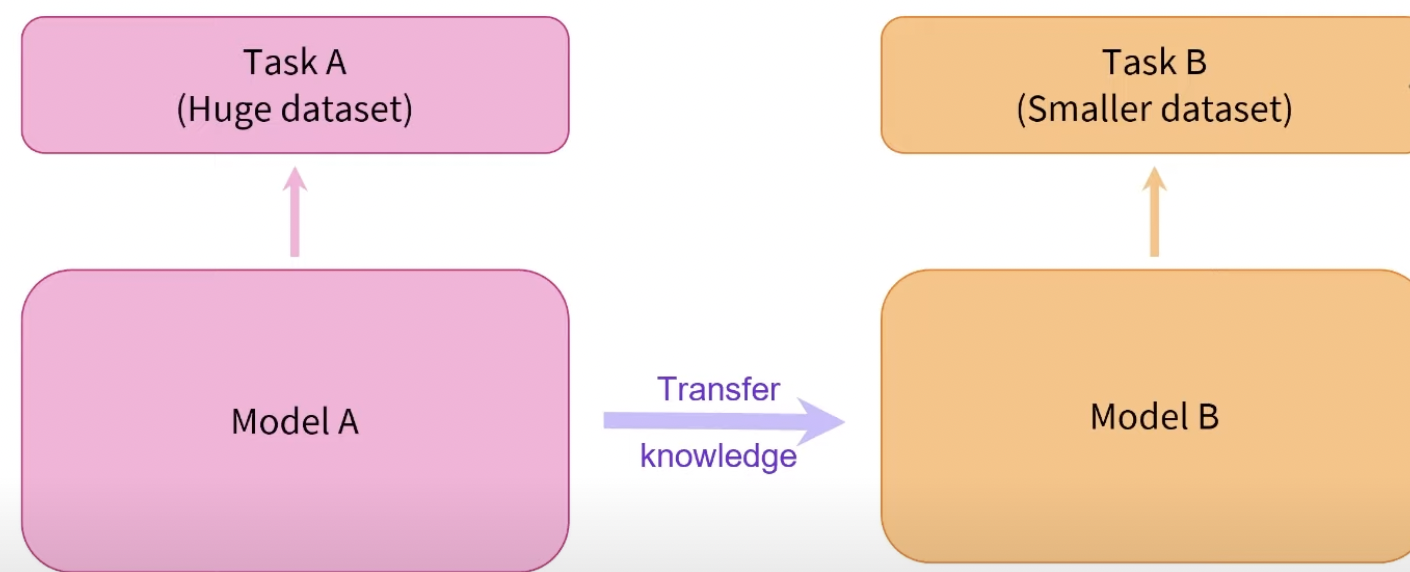

Usually, transfer learning is applied by dropping the head (last layers) of the pre-trained model.

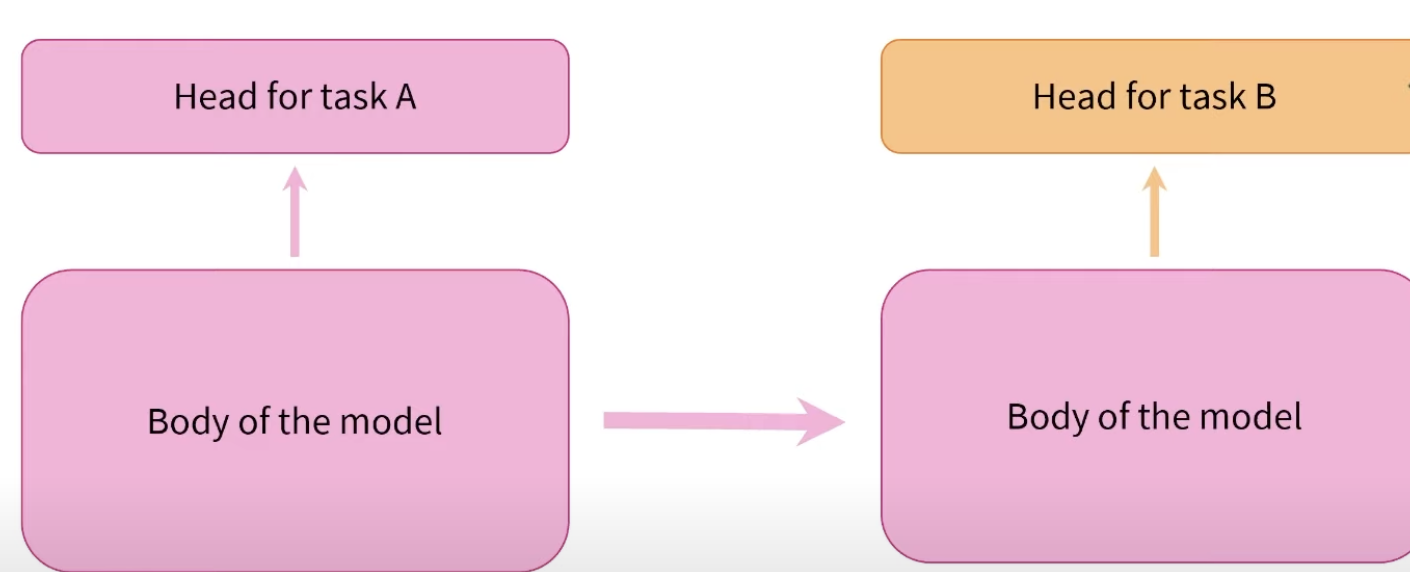

In transfer learning, to be as efficient as possible, the pre-trained model used should be as similar as possible to the task it is fine-tuned on.

**NOTE:** The pre-trained not only transfers it knowledge, but also any bias it may contain.

## Pre-trained model vs Fine-tuned model
- Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.
  - This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.
- Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained model, then perform additional training with a dataset specific to your task.

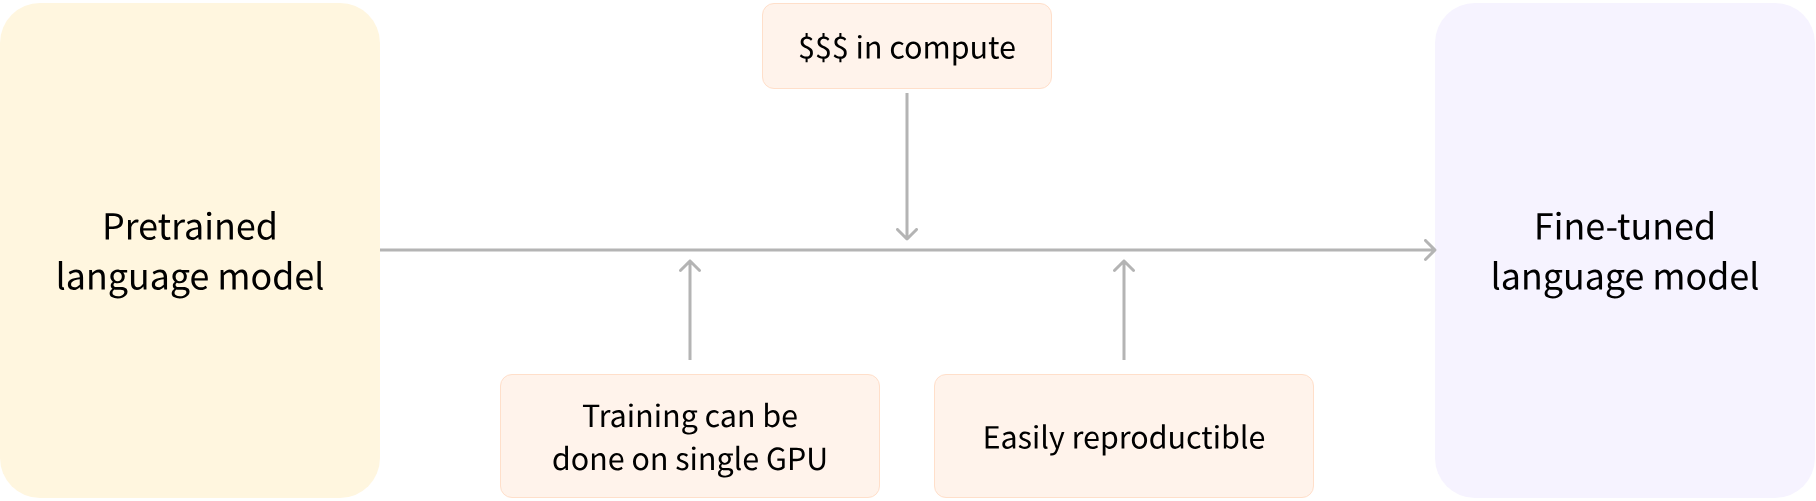

# The Transformer Architecture

A key feature of Transformer models is that they are built with special layers called attention layers. In fact, the title of the paper introducing the Transformer architecture was [“Attention Is All You Need”!](https://arxiv.org/abs/1706.03762)

The transformer architecture has two pieces: encoder and decoder.

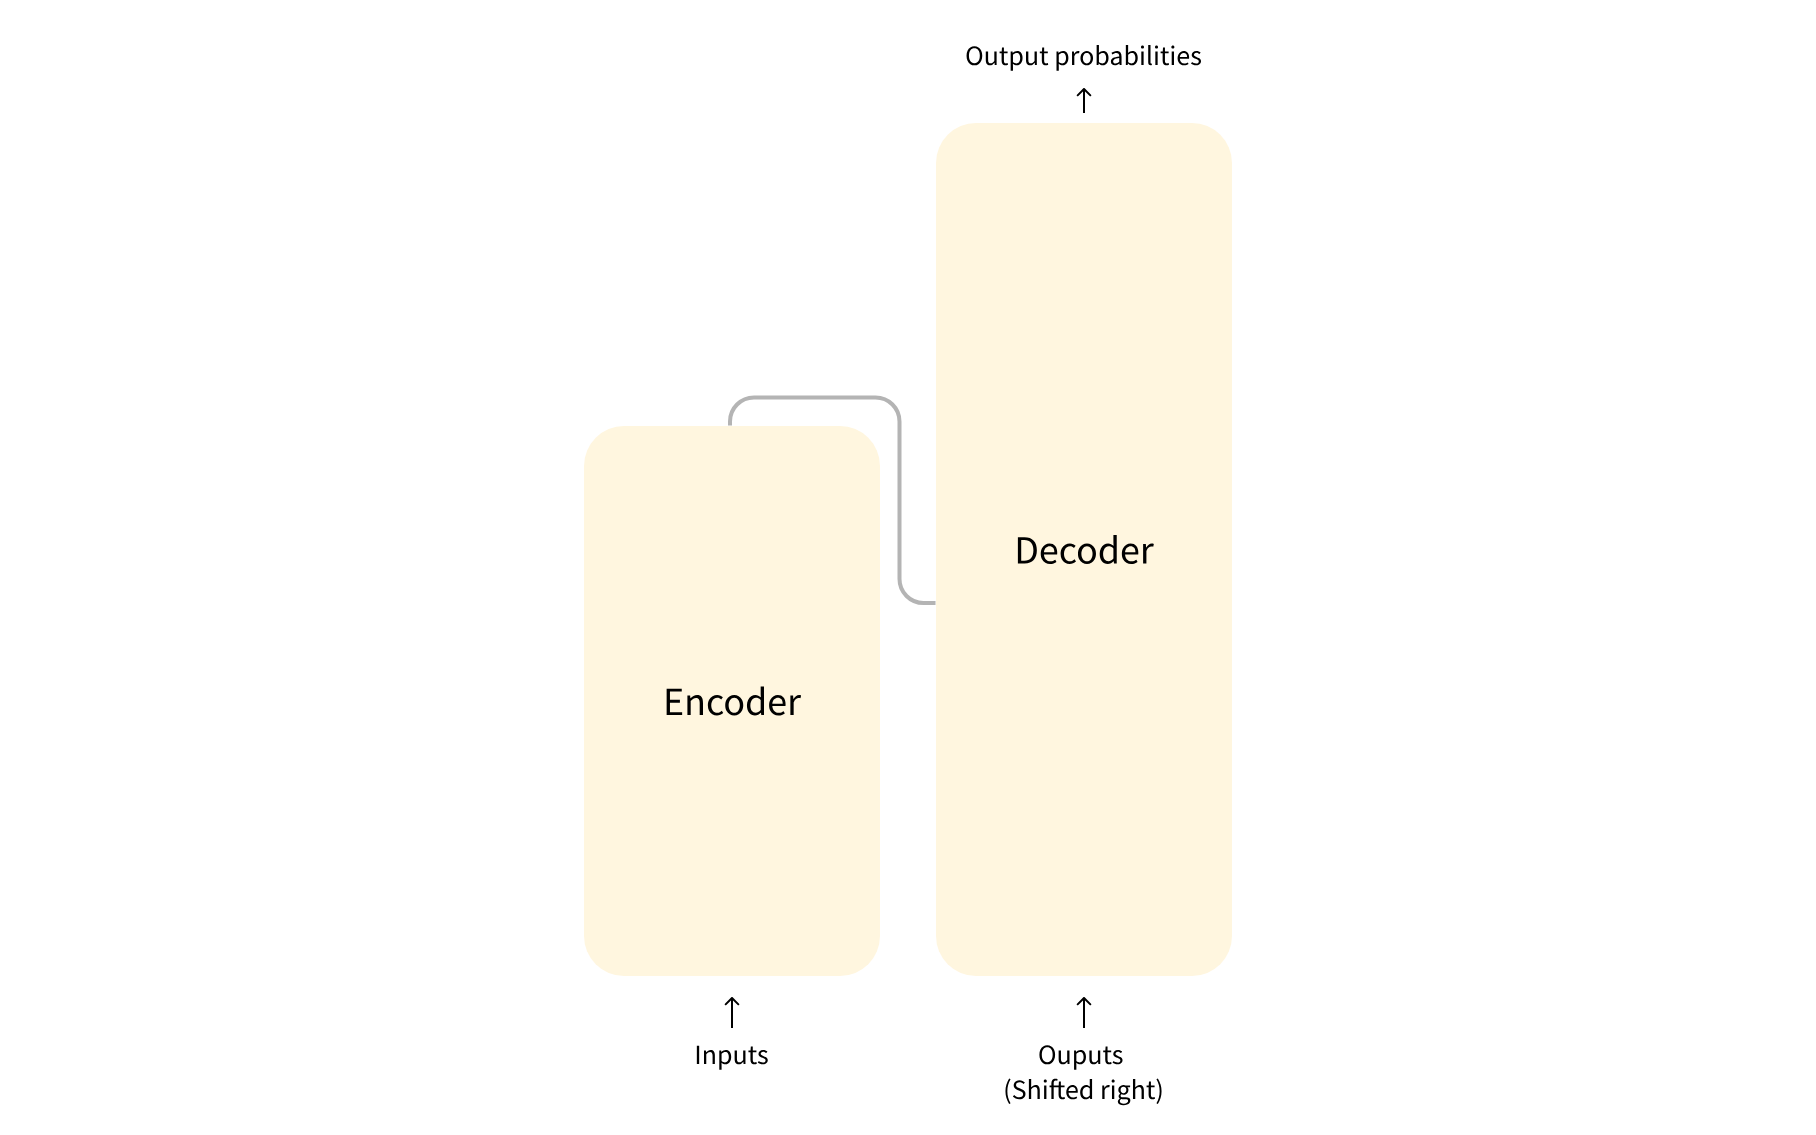

The two pieces can be used together, but they can also be used independently.

- Encoder: The encoder receives an input (text) and builds a (numerical) representation of it (its features) or embeddings.
- Decoder: The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence.

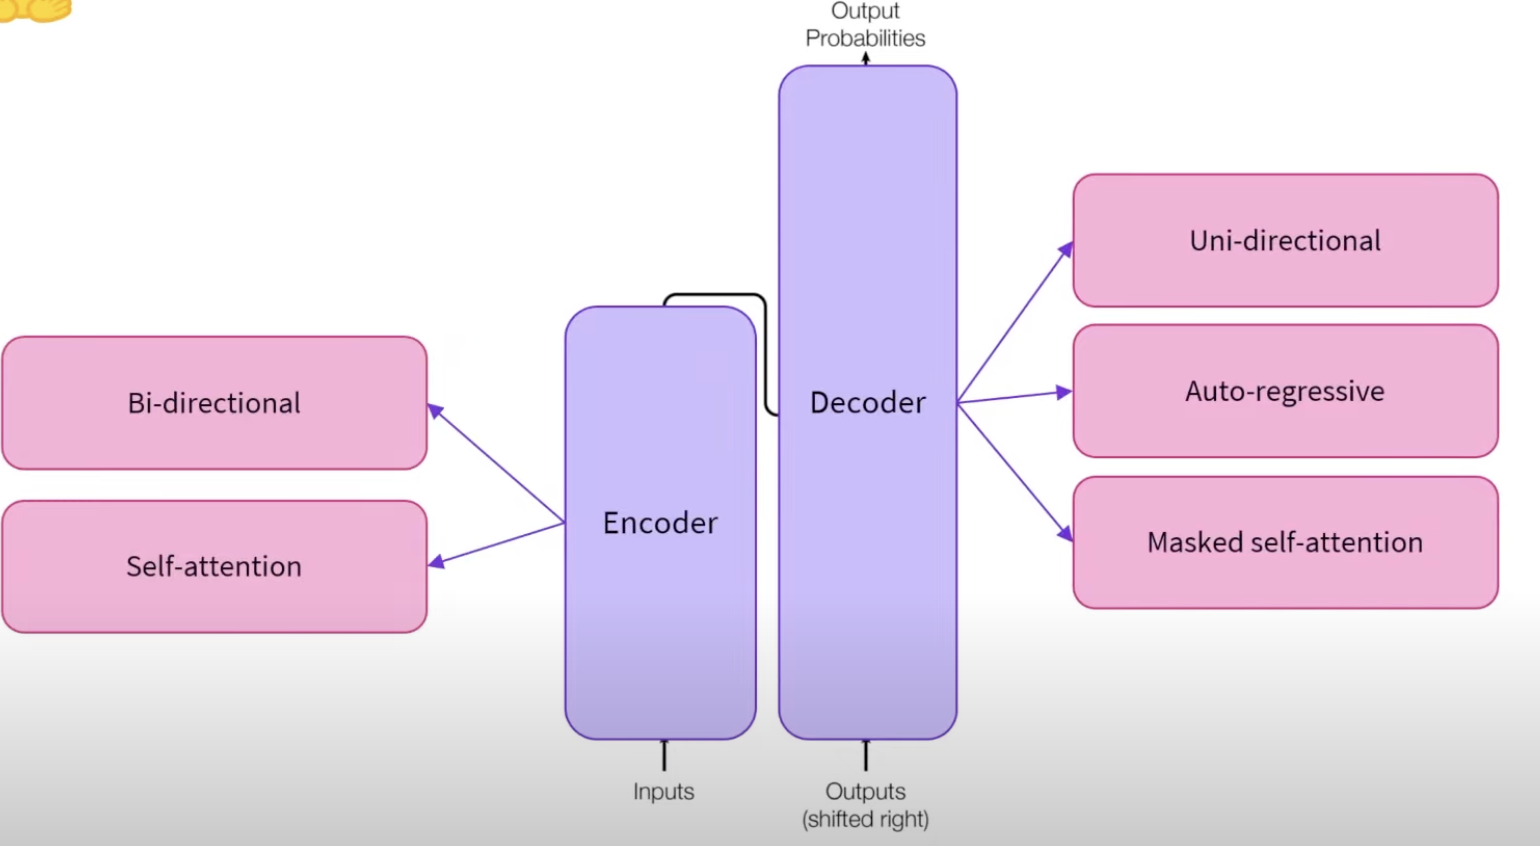

# Encoder Architecture

-  Most popular encoder only architecture: BERT
-  At each stage, the attention layers can access all the words in the initial sentence.
- These models are often characterized as having “bi-directional” attention, and are often called auto-encoding models.


- The pretraining of these models usually revolves around somehow corrupting parts of a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.
- Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.


- **The encoder outputs a numerical representation for each word in the input.**

- The numerical representation may be called feature vectors, embedding, vector representation, feature tensor, etc.

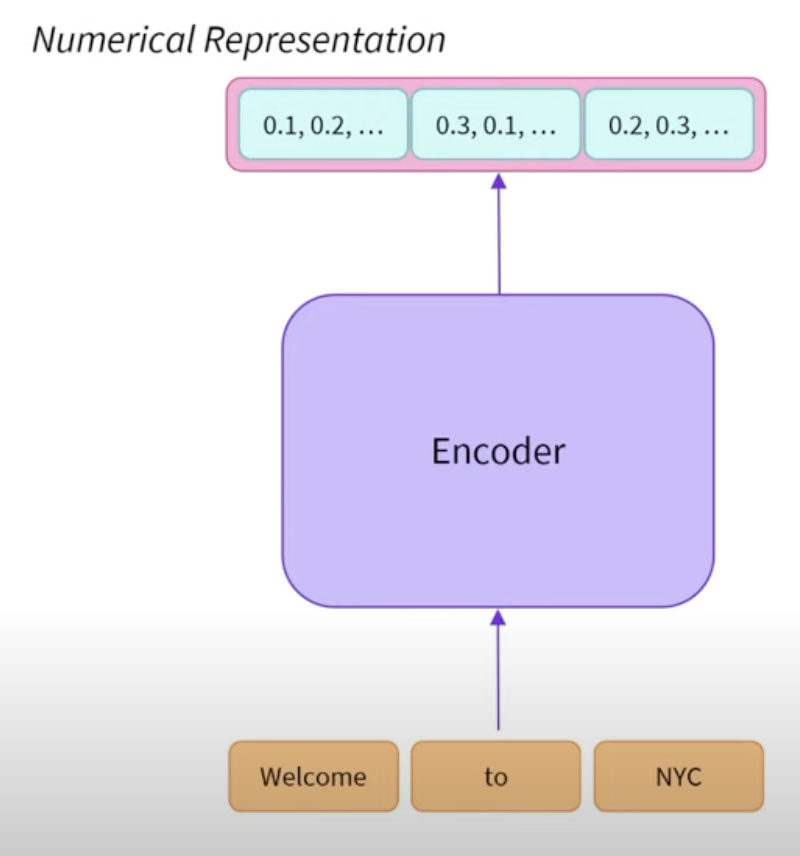

- The dimension of the vector is defined by the architecture of the model. For example, BERT vector dimensions are of 768 length.

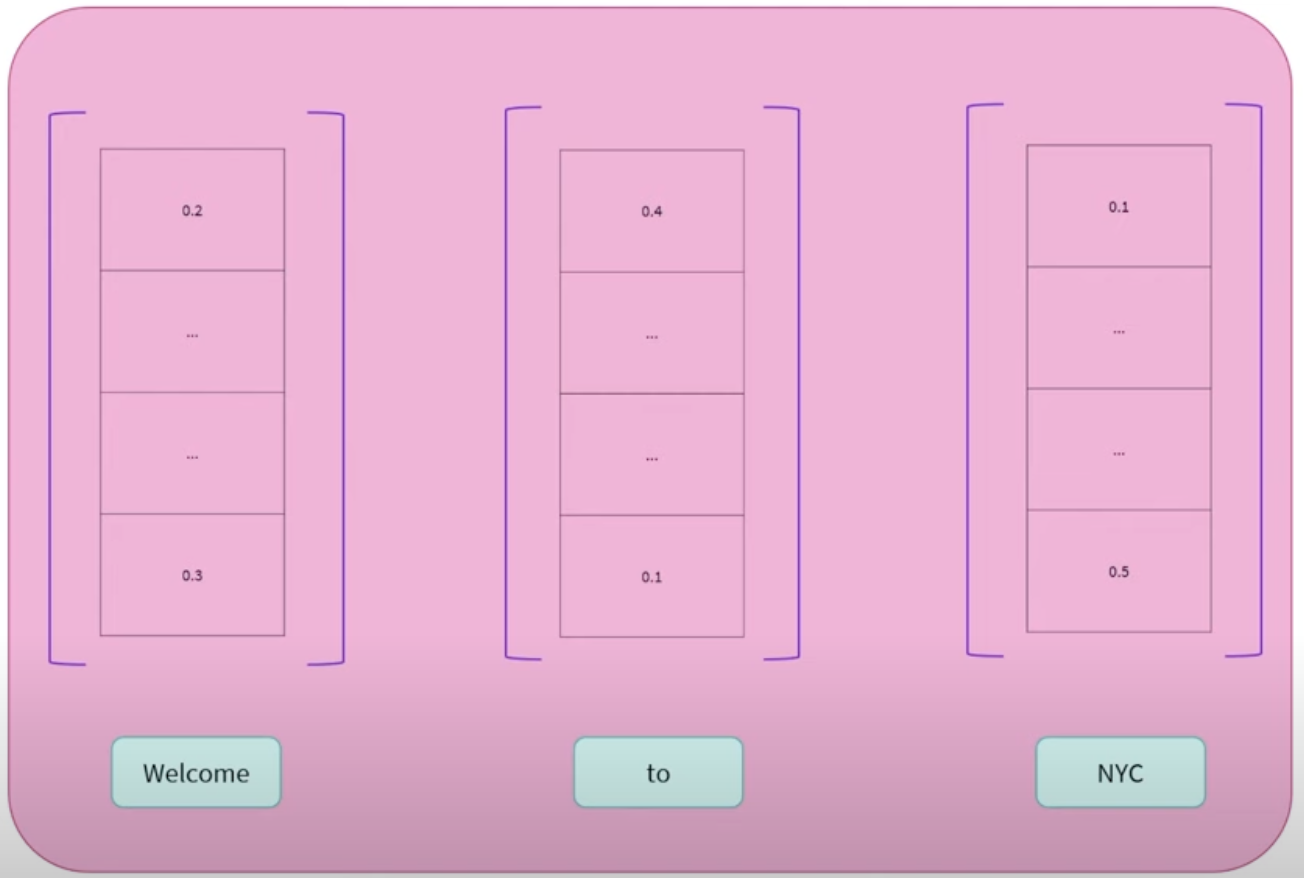

- These representations contain the value of a word but contextualized. For example, the vector attributed to the word "to" isn't the representation of only the "to" word.
- It also takes into account the words around it, thereby recording the context (both left context and right context - bidirectional).
- This is called a contextualized representation or self-attention.


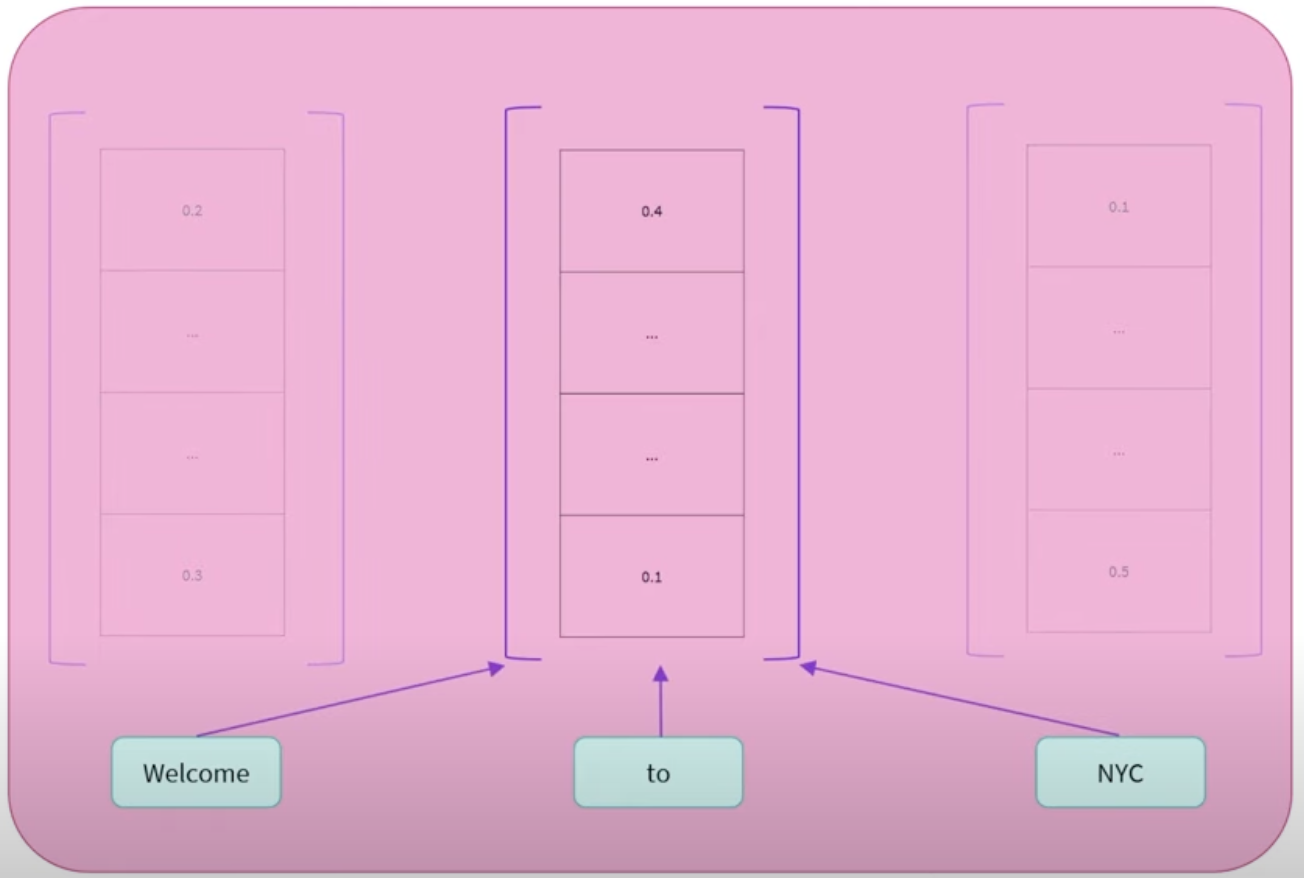

# Decoder Architecture

- Most popular architecture: GPT2
- Decoders and encoders are quite similar.
- One can use a decoder of the same tasks as an encoder, albiet with, generally, a little loss of performance.

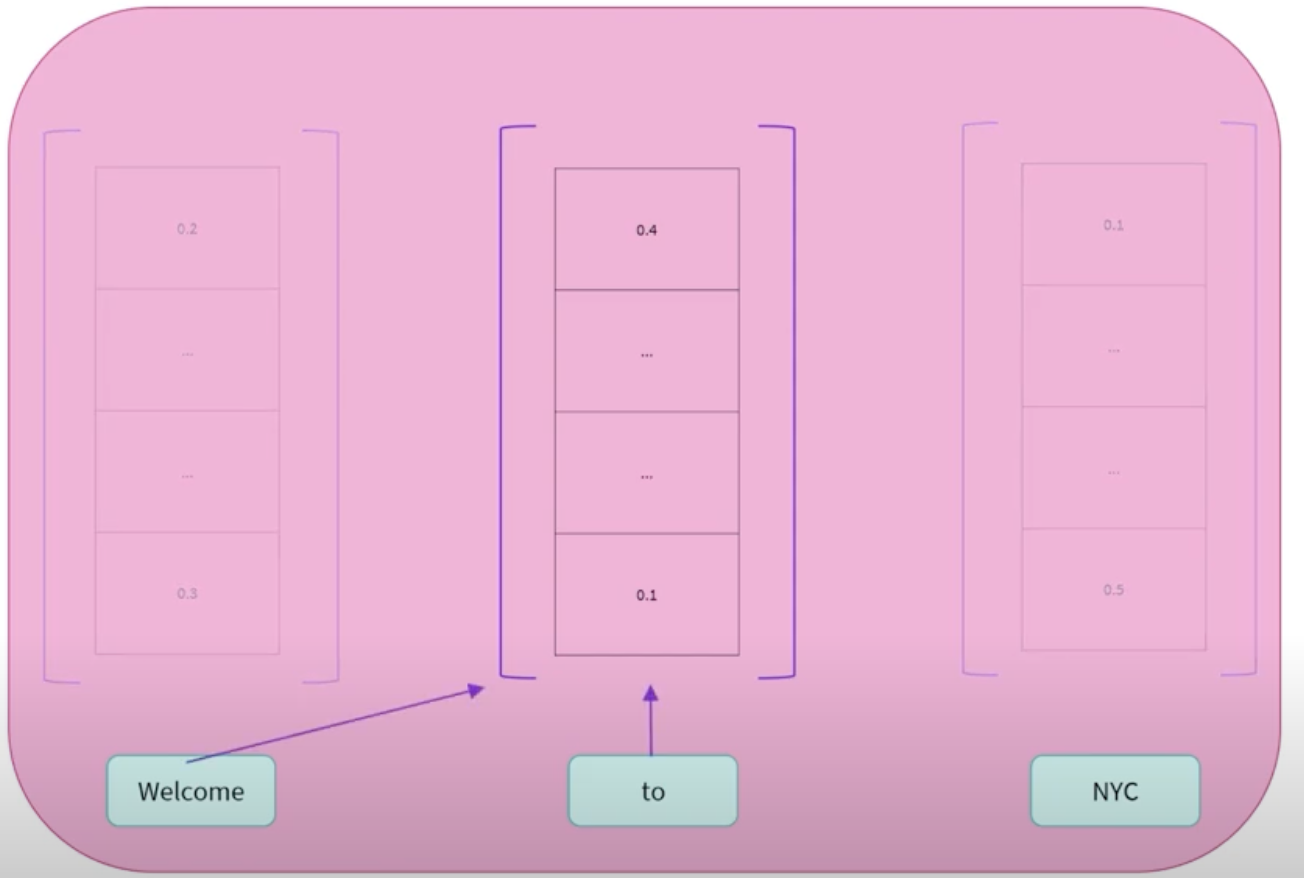

- Where the decoder differs from the encoder is principally with its attention mechanism.
- Decoders use masked self-attention. That is, only left context is available to create feature representations (unidirectional).
- At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models.
- The pretraining of decoder models usually revolves around predicting the next word in the sentence.
- These models are best suited for tasks involving text generation.



# Encoder-Decoder Architecture

Also, called sequence-to-sequence models

- At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input and the ouptut it has predicted (auto-regressive) in the previous stage.

- Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

- Encoders and Decoders do not share weights.
- Encoders takes care of understanding the sequence.
- The sole purpose of the decoder is to decode the numerical representation outputted by the encoder, and, then, generate a seqeunce.



- Using the encoder feature representation and a prompt as input, the decoder generates a word.


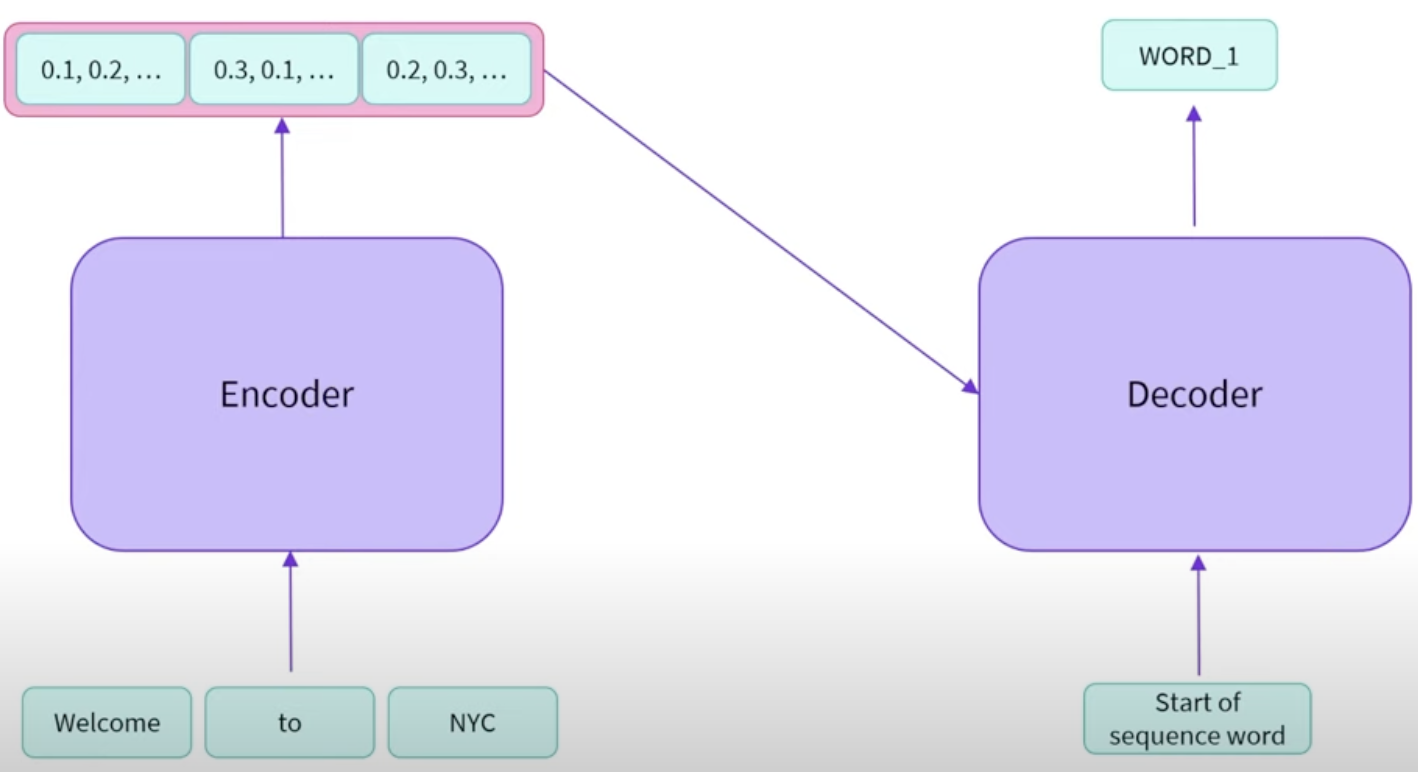

- It then uses a combination of the representation and the word it just generated to generate a second word.


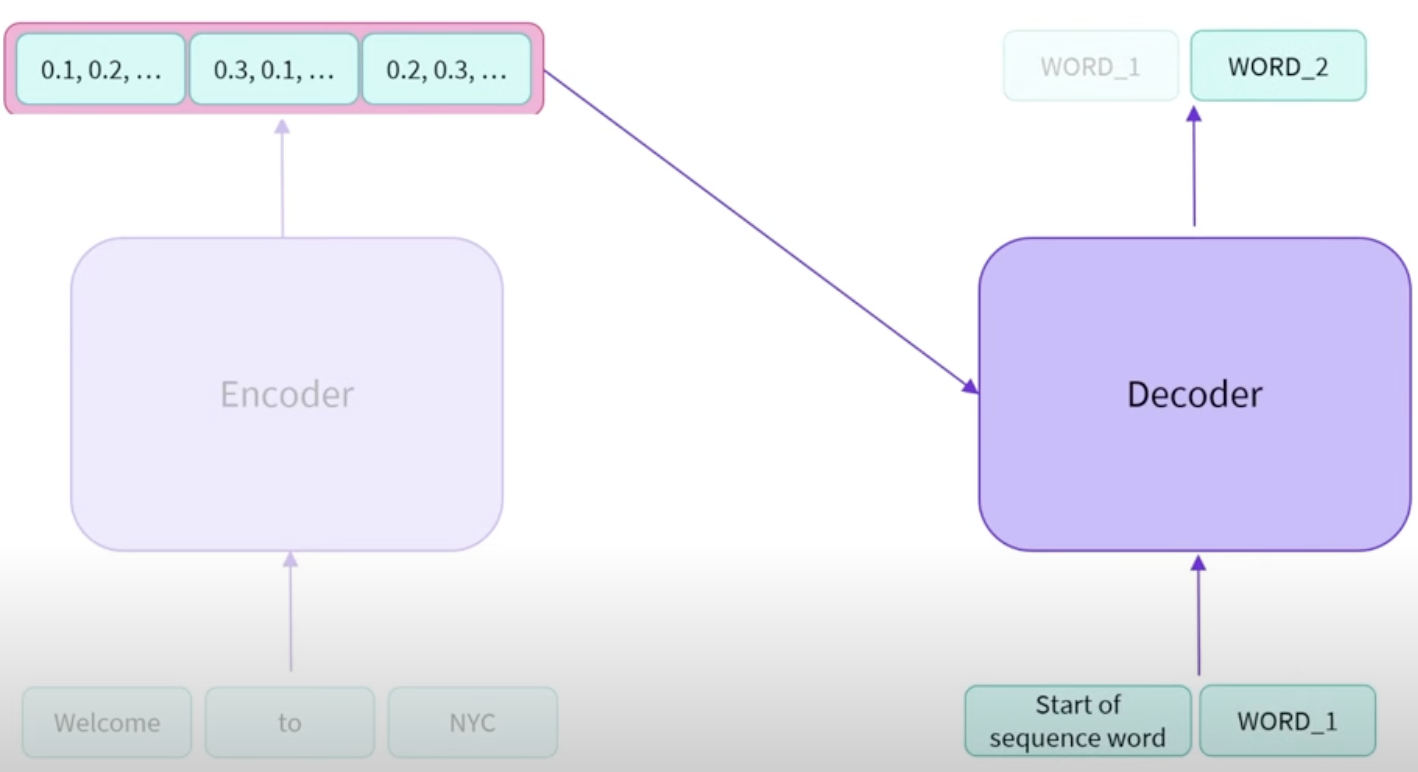

And so on!

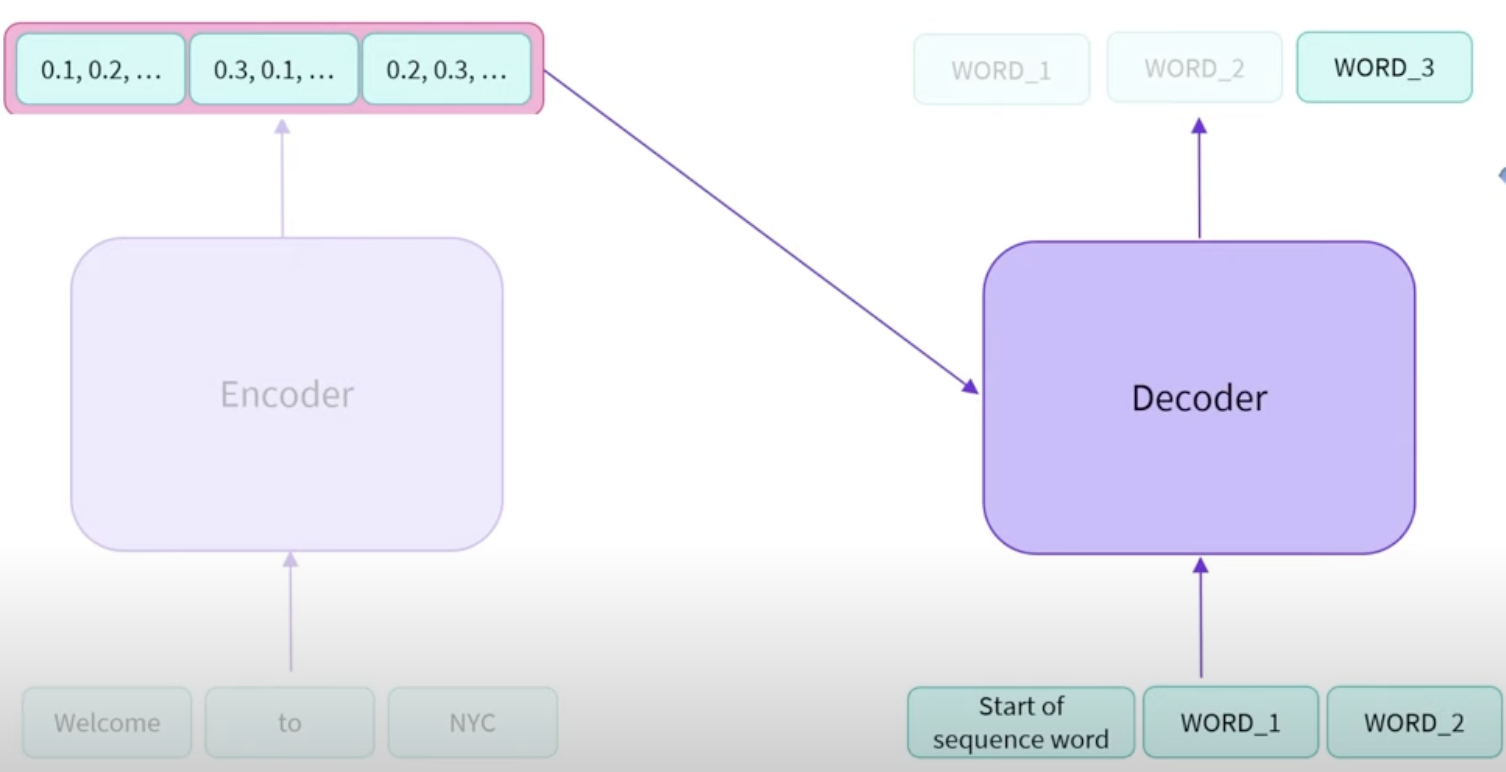